In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

### Loading data

In [2]:
# Loading data
us_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\USvideos.csv')
ca_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\CAvideos.csv')
de_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\DEvideos.csv')
fr_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\FRvideos.csv')
gb_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\GBvideos.csv')
in_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\INvideos.csv')
jp_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\JPvideos.csv')
kr_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\KRvideos.csv')
mx_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\MXvideos.csv')
ru_video_data = pd.read_csv(r'C:\Users\joshn\Downloads\MS in Data Science\Youtube analysis\RUvideos.csv')
all_country_videos = pd.concat([us_video_data,ca_video_data,de_video_data,fr_video_data,in_video_data,jp_video_data,
                               kr_video_data,mx_video_data,ru_video_data])

In [3]:
all_country_videos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
us_video_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
# Correcting dates
us_video_data['trending_date']=pd.to_datetime(pd.Series(us_video_data['trending_date'].apply(lambda x:'20'+x[0:2]+'.'+x[6:]+'.'+x[3:5])))
us_video_data['publish_time']=pd.to_datetime(pd.Series(us_video_data['publish_time'].apply(lambda x:x[:19])))
us_video_data[0:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [6]:
# Checking data scope

print(us_video_data['trending_date'].min())
print(us_video_data['trending_date'].max())

2017-11-14 00:00:00
2018-06-14 00:00:00


In [7]:
# Confirming level of data
us_video_data['date'] = us_video_data['publish_time'].dt.date
us_video_data['video_id_date'] = us_video_data['video_id'].astype(str) + us_video_data['trending_date'].astype(str)
print(len(us_video_data['video_id_date'].unique()))
print(us_video_data.shape)

40899
(40949, 18)


### EDA

In [8]:
# checking unique values in each data
print(len(us_video_data.nunique()))
print(len(ca_video_data.nunique()))
print(len(de_video_data.nunique()))
print(len(fr_video_data.nunique()))
print(len(gb_video_data.nunique()))
print(len(in_video_data.nunique()))
print(len(jp_video_data.nunique()))
print(len(kr_video_data.nunique()))
print(len(mx_video_data.nunique()))
print(len(ru_video_data.nunique()))

18
16
16
16
16
16
16
16
16
16


In [9]:
# Testing null values
print(us_video_data.isnull().sum())
print(ca_video_data.isnull().sum())
print(de_video_data.isnull().sum())
print(fr_video_data.isnull().sum())
print(gb_video_data.isnull().sum())
print(in_video_data.isnull().sum())
print(jp_video_data.isnull().sum())
print(kr_video_data.isnull().sum())
print(mx_video_data.isnull().sum())
print(ru_video_data.isnull().sum())
# Intrestingly, only description columns have nulls.

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
date                        0
video_id_date               0
dtype: int64
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_o

In [10]:
# I am going to use US data:
us_video_data['description']=us_video_data['description'].fillna("")
us_video_data.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
date                      0
video_id_date             0
dtype: int64

In [11]:
us_video_data[0:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,video_id_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,2kyS6SvSYSE2017-11-14
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,1ZAPwfrtAFY2017-11-14


In [12]:
len(us_video_data['video_id'].unique())

6351

In [13]:
len(us_video_data['category_id'].unique())

16

In [14]:
us_video_data['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
43      57
29      57
Name: category_id, dtype: int64

In [15]:
us_video_data['video_id'].value_counts()

j4KvrAUjn6c    30
t4pRQ0jn23Q    29
8h--kFui1JA    29
iILJvqrAQ_w    29
QBL8IRJ5yHU    29
               ..
Oy9R-z7YTRc     1
aPrpWFl2eik     1
6OSySP61QuA     1
rJfFxDQ-8ok     1
-t5YLGn3VHQ     1
Name: video_id, Length: 6351, dtype: int64

In [16]:
x = us_video_data.groupby('video_id')['title'].nunique() 
x.value_counts()

1    6242
2     106
3       3
Name: title, dtype: int64

In [17]:
us_video_data['score'] = (us_video_data['likes']-1.5*us_video_data['dislikes']) * us_video_data['comment_count'] /us_video_data['views']

In [18]:
us_video_data[0:2]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,video_id_date,score
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,2kyS6SvSYSE2017-11-14,1131.528370
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,1ZAPwfrtAFY2017-11-14,461.981128


In [19]:
label = np.zeros(np.shape(us_video_data['views']))

In [20]:
us_video_data['views']

0          748374
1         2418783
2         3191434
3          343168
4         2095731
           ...   
40944     1685609
40945     1064798
40946     1066451
40947     5660813
40948    10306119
Name: views, Length: 40949, dtype: int64

In [21]:
k = len(us_video_data['views'])
for i in range(k):
    if us_video_data['views'][i] < 100000:
        label[i] = 0
    elif us_video_data['score'][i] < 0.0:
        label[i] = 1
    elif us_video_data['score'][i] < 300.0:
        label[i] = 2
    else:
        label[i] = 3
us_video_data['label'] = label

In [22]:
us_video_data.shape

(40949, 20)

In [23]:
us_video_data[['video_id','thumbnail_link']].value_counts()

video_id     thumbnail_link                                
j4KvrAUjn6c  https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg    30
t4pRQ0jn23Q  https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg    29
8h--kFui1JA  https://i.ytimg.com/vi/8h--kFui1JA/default.jpg    29
MAjY8mCTXWk  https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg    29
iILJvqrAQ_w  https://i.ytimg.com/vi/iILJvqrAQ_w/default.jpg    29
                                                               ..
PXi4JIklpOs  https://i.ytimg.com/vi/PXi4JIklpOs/default.jpg     1
Vvya3yofDY4  https://i.ytimg.com/vi/Vvya3yofDY4/default.jpg     1
7FceZB6qMiA  https://i.ytimg.com/vi/7FceZB6qMiA/default.jpg     1
kjkw7rKhPfc  https://i.ytimg.com/vi/kjkw7rKhPfc/default.jpg     1
Mfiim71QdYQ  https://i.ytimg.com/vi/Mfiim71QdYQ/default.jpg     1
Length: 6354, dtype: int64

In [24]:
usa_trend = us_video_data.title.value_counts().values.mean()
cat_rend = ca_video_data.title.value_counts().values.mean()
de_trend = de_video_data.title.value_counts().values.mean()
fr_trend = fr_video_data.title.value_counts().values.mean()
gb_trend = gb_video_data.title.value_counts().values.mean()
in_trend = in_video_data.title.value_counts().values.mean()
jp_trend = jp_video_data.title.value_counts().values.mean()
kr_trend = kr_video_data.title.value_counts().values.mean()
mx_trend = mx_video_data.title.value_counts().values.mean()
ru_trend = ru_video_data.title.value_counts().values.mean()

In [25]:
us_video_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'date', 'video_id_date',
       'score', 'label'],
      dtype='object')

In [26]:
#ratio of likes  upto 3 decimal
us_video_data['likes_ratio']=us_video_data['likes']/us_video_data['views']*100
#ratio of dislikes  upto 3 decimal
us_video_data['dislikes_ratio']=us_video_data['dislikes']/us_video_data['views']*100
#ratio of comment_count  upto 3 decimal
us_video_data['comment_ratio']=us_video_data['comment_count']/us_video_data['views'] *100
#ratio of likes/dislikes  upto 3 decimal
us_video_data['likes_dislikes_ratio']=us_video_data['likes']/us_video_data['dislikes'] /100

In [27]:
us_video_data.shape

(40949, 24)

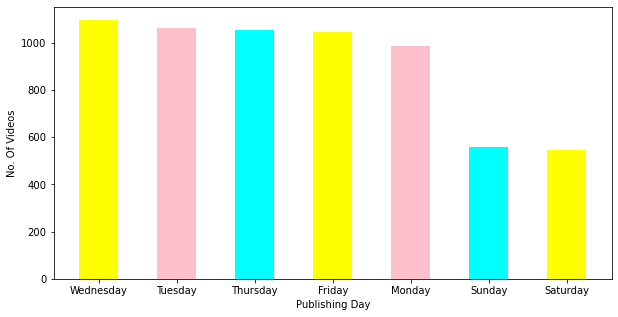

In [28]:
us_video_data['Date'] = pd.to_datetime(us_video_data['publish_time'], errors='coerce')
us_video_data_dedup = us_video_data.drop_duplicates(subset = 'video_id')
day=pd.to_datetime(us_video_data_dedup['publish_time']).dt.day_name()
my_dict=(day.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Day','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Day'],count['No. Of Videos'],color=['yellow', 'pink', 'cyan'],width=0.5)
plt.xlabel("Publishing Day")
plt.ylabel("No. Of Videos")
plt.show()
# I can see that the number of trending videos published on Saturday and Sunday are noticeably less than the number of trending videos published on other days of the week

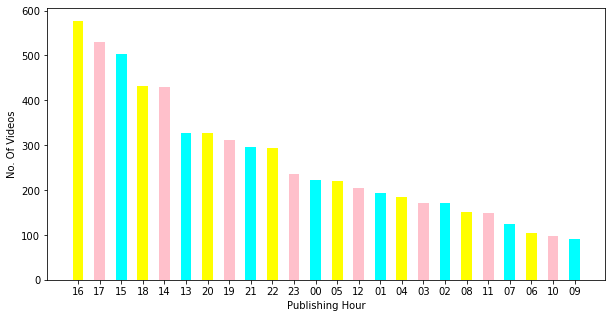

In [29]:
hour=pd.to_datetime(us_video_data_dedup.publish_time).apply(lambda x: x.strftime("%H"))
my_dict=(hour.value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Publishing Hour','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Publishing Hour'],count['No. Of Videos'],color=['yellow', 'pink', 'cyan'],width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No. Of Videos")
plt.show()
# I can see that the period between 2PM and 7PM, period between 4PM and 5PM, have the largest number of trending videos.
# Noticed that the period between 12AM and 1PM have the smallest number of trending videos. 
# But why is that? Is it because people publish a lot more videos between 2PM and 7PM? 
# Is it because how YouTube algorithm chooses trending videos?

In [30]:
us_video_data['likes'].describe()

count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64

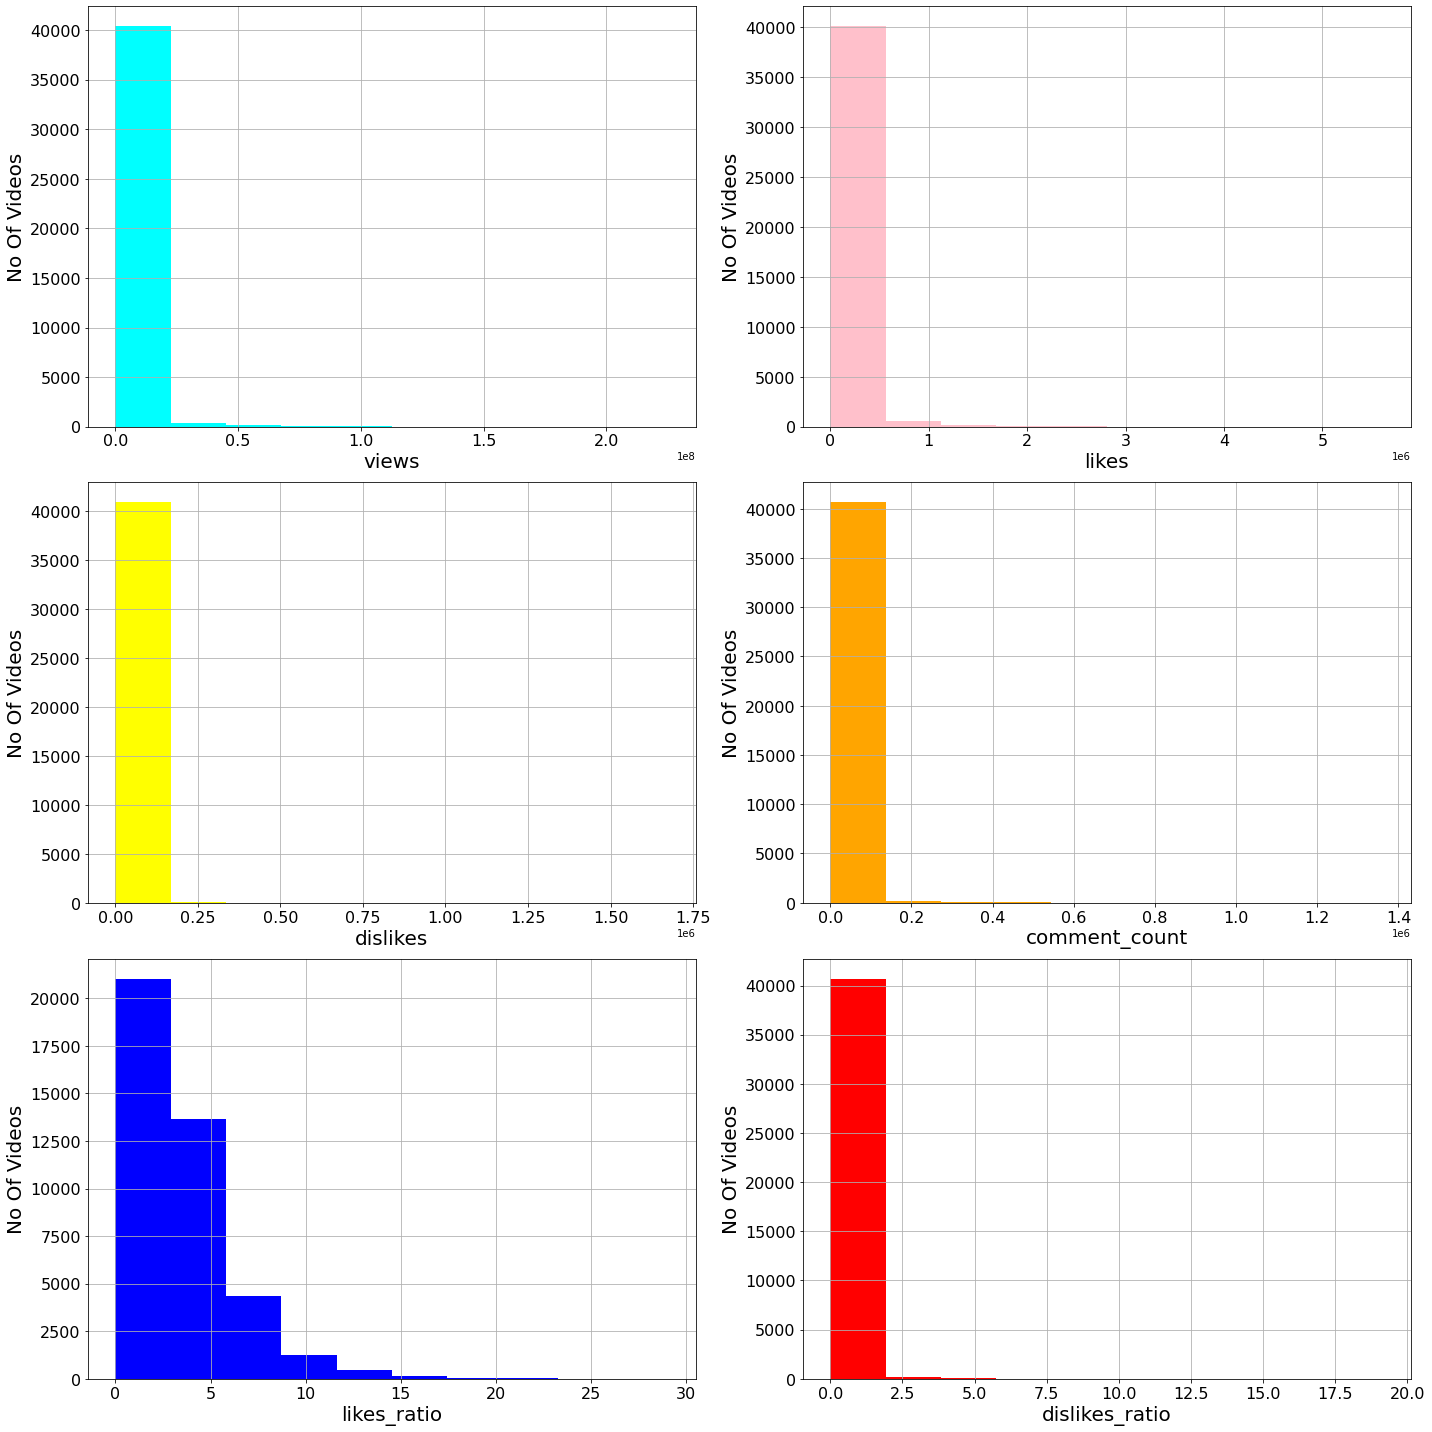

In [31]:
numerical=['views','likes','dislikes','comment_count','likes_ratio','dislikes_ratio','comment_ratio','likes_dislikes_ratio']
color=['cyan','pink','yellow','orange','blue','red','purple','green']
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for var,i,subplot in zip(numerical,color, ax.flatten()):
    ax=us_video_data[var].hist(ax=subplot,ylabelsize=16,xlabelsize=16,color=i)
    ax.set_xlabel(var,fontsize=20)
    ax.set_ylabel("No Of Videos",fontsize=20)
fig.tight_layout()  

In [32]:
us_video_data['publish_time'][0:3]

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
Name: publish_time, dtype: datetime64[ns]

In [33]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(data, nGraphShown, nGraphPerRow):
    nunique = data.nunique()
    data = data[[col for col in data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = data.shape
    columnNames = list(data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

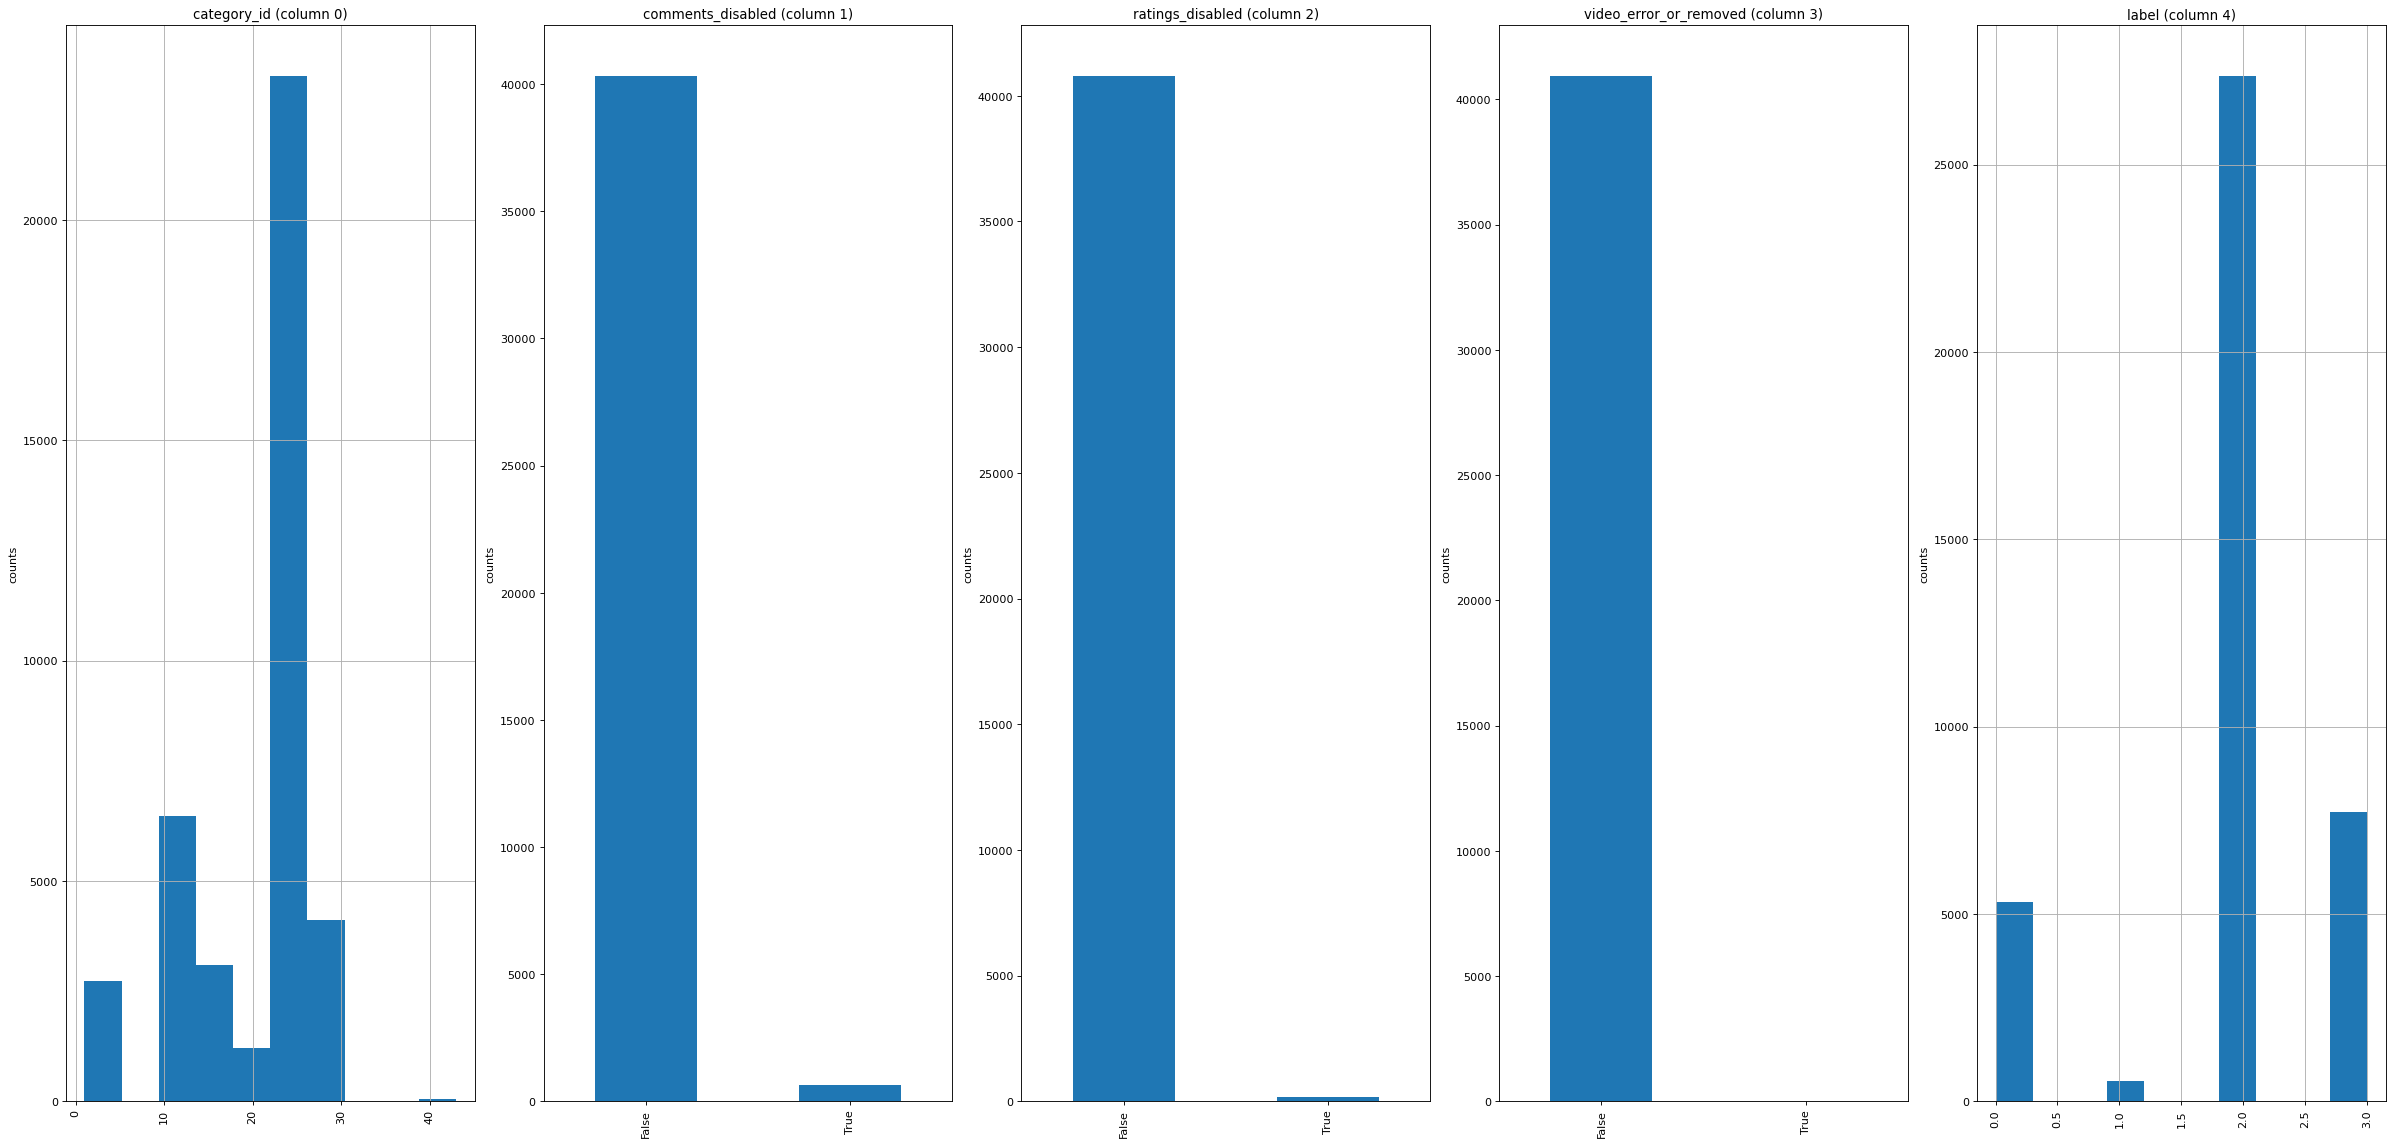

In [34]:
plotPerColumnDistribution(us_video_data, 10, 5)

In [35]:
us_video_data.shape

(40949, 25)

In [36]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    filename = data.dataframeName
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [37]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

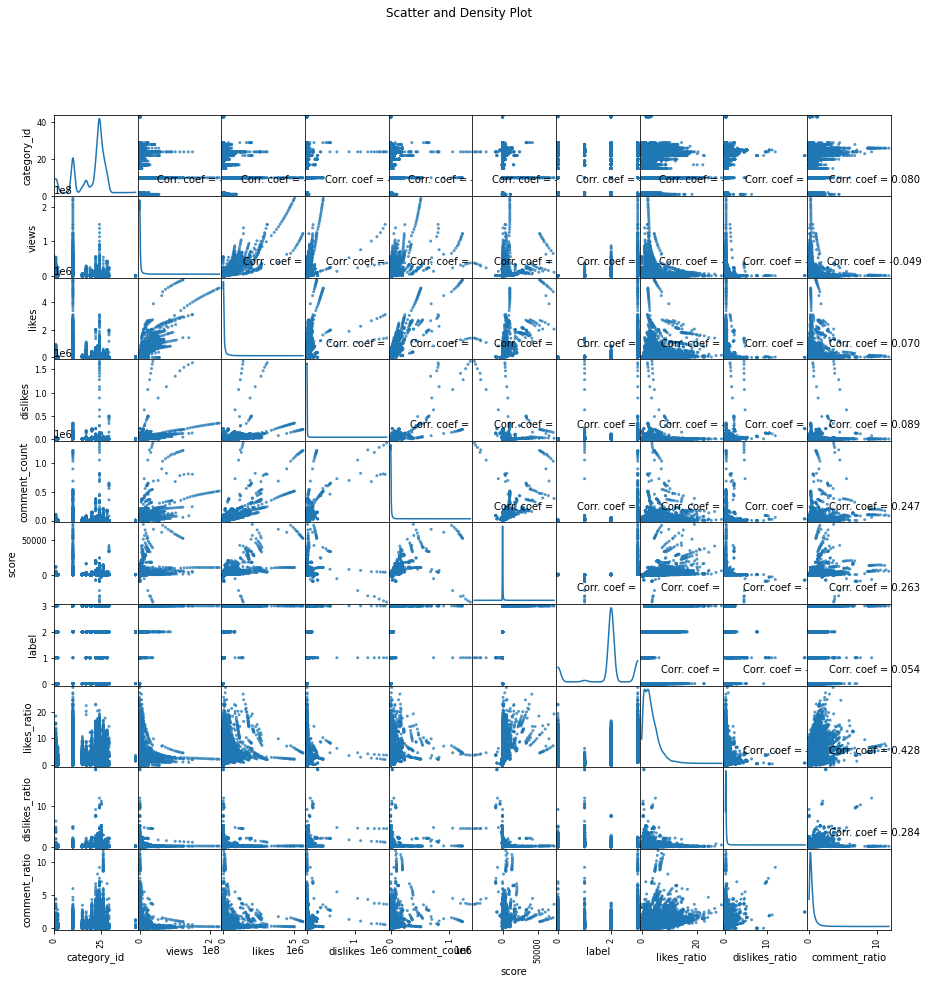

In [38]:
plotScatterMatrix(us_video_data, 15, 10)

In [40]:
us_video_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'date', 'video_id_date',
       'score', 'label', 'likes_ratio', 'dislikes_ratio', 'comment_ratio',
       'likes_dislikes_ratio', 'Date'],
      dtype='object')

In [41]:
pd.options.display.float_format = "{:.2f}".format
us_video_data.describe()

,category_id,views,likes,dislikes,comment_count,score,label,likes_ratio,dislikes_ratio,comment_ratio,likes_dislikes_ratio
count,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00,40949.00,40779.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80,376.22,1.92,3.44,0.16,0.45,inf
std,7.57,7394113.76,228885.34,29029.71,37430.49,2204.70,0.85,2.70,0.38,0.57,NaN
min,1.00,549.00,0.00,0.00,0.00,-40225.90,0.00,0.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00,10.02,2.00,1.50,0.06,0.16,0.13
50%,24.00,681861.00,18091.00,631.00,1856.00,46.40,2.00,2.83,0.09,0.30,0.29
75%,25.00,1823157.00,55417.00,1938.00,5755.00,189.68,2.00,4.68,0.16,0.52,0.57
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00,73470.69,3.00,29.05,19.15,11.76,inf


In [42]:
x=[2000000,40000,2000,5000,15]
for i,j in zip(numerical,x):
    c=us_video_data[i].loc[us_video_data[i]<=j].count()/us_video_data[i].count()*100
    print(i,c)
# verified above inference. 77% of data trended with less than 2 million views, 
# 68% of the videos that trended have 400k or less likes, 75% of the data have 2000 or less dislikes 

views 76.9811228601431
likes 68.4900730176561
dislikes 75.49879117927178
comment_count 72.26305892695792
likes_ratio 99.54821851571467


In [43]:
numerical

['views',
 'likes',
 'dislikes',
 'comment_count',
 'likes_ratio',
 'dislikes_ratio',
 'comment_ratio',
 'likes_dislikes_ratio']

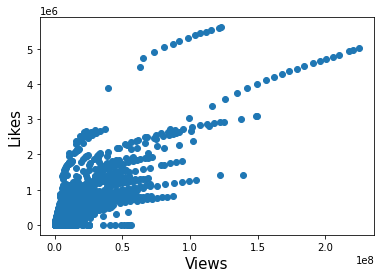

In [44]:
plt.scatter(us_video_data['views'],us_video_data['likes'])
plt.xlabel("Views",size=15)
plt.ylabel("Likes",size=15)
plt.show()
# There is a strong linear relation between the no of views and the no of likes on a video. I see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

In [45]:
us_video_data['category_name'] = np.nan
us_video_data.loc[(us_video_data["category_id"] == 1),"category_name"] = 'Film and Animation'
us_video_data.loc[(us_video_data["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
us_video_data.loc[(us_video_data["category_id"] == 10),"category_name"] = 'Music'
us_video_data.loc[(us_video_data["category_id"] == 15),"category_name"] = 'Pets and Animals'
us_video_data.loc[(us_video_data["category_id"] == 17),"category_name"] = 'Sport'
us_video_data.loc[(us_video_data["category_id"] == 19),"category_name"] = 'Travel and Events'
us_video_data.loc[(us_video_data["category_id"] == 20),"category_name"] = 'Gaming'
us_video_data.loc[(us_video_data["category_id"] == 22),"category_name"] = 'People and Blogs'
us_video_data.loc[(us_video_data["category_id"] == 23),"category_name"] = 'Comedy'
us_video_data.loc[(us_video_data["category_id"] == 24),"category_name"] = 'Entertainment'
us_video_data.loc[(us_video_data["category_id"] == 25),"category_name"] = 'News and Politics'
us_video_data.loc[(us_video_data["category_id"] == 26),"category_name"] = 'How to and Style'
us_video_data.loc[(us_video_data["category_id"] == 27),"category_name"] = 'Education'
us_video_data.loc[(us_video_data["category_id"] == 28),"category_name"] = 'Science and Technology'
us_video_data.loc[(us_video_data["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
us_video_data.loc[(us_video_data["category_id"] == 43),"category_name"] = 'Shows'


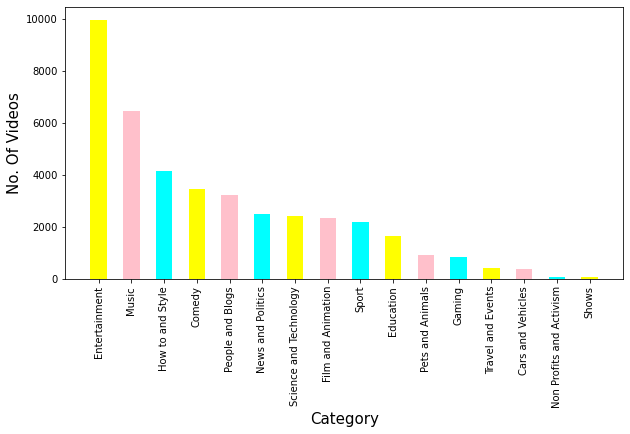

In [46]:
# Now we can see which categories have the largest number of trending videos
my_dict=(us_video_data['category_name'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Category','No. Of Videos']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Category'],count['No. Of Videos'],color=['yellow', 'pink', 'cyan'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("No. Of Videos",size=15)
plt.show()

                        category_name    likes
category_id                                   
1                  Film and Animation   922355
2                   Cars and Vehicles    97030
10                              Music  5613827
15                   Pets and Animals   178243
17                              Sport  1121217
19                  Travel and Events    42447
20                             Gaming   444203
22                   People and Blogs  2032463
23                             Comedy   865679
24                      Entertainment  3093544
25                  News and Politics   163338
26                   How to and Style   605954
27                          Education   240989
28             Science and Technology   564804
29           Non Profits and Activism  1988746
43                              Shows    33261


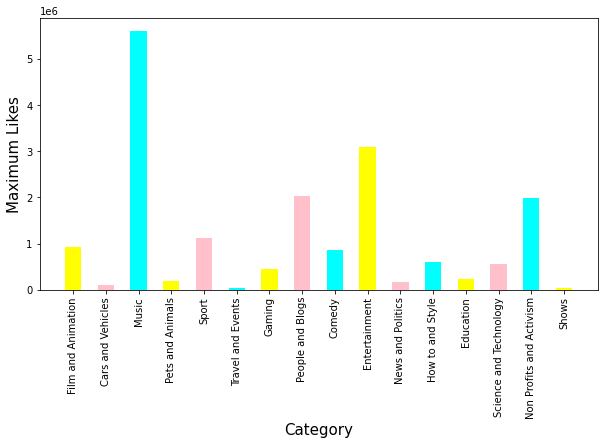

In [47]:
# Now let's see which category has the maximum likes
s=us_video_data.groupby('category_id')
f=s['category_name','likes'].max()
print(f)
fig=plt.figure(figsize=(10,5))
plt.bar(f['category_name'],f['likes'],color=['yellow', 'pink', 'cyan'],width=0.5)
plt.xticks(rotation=90)
plt.xlabel("Category",size=15)
plt.ylabel("Maximum Likes",size=15)
plt.show()

In [48]:
us_video_data.describe(include="object")
# There are 6351 unique video IDs, we expect to have 6351 unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. 
# Similar explaination applies for description column as well.

,video_id,title,channel_title,tags,thumbnail_link,description,date,video_id_date,category_name
count,40949,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,6455,2207,6055,6352,6902,313,40899,16
top,j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,,2017-12-22,HrQNdClwMs42018-05-15,Entertainment
freq,30,30,203,1535,30,570,452,2,9964


In [49]:
# To verify our interpretation for title column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles
grouped = us_video_data.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]
# I can see that this video appeared on the list with two different titles.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,date,video_id_date,score,label,likes_ratio,dislikes_ratio,comment_ratio,likes_dislikes_ratio,Date,category_name
14266,0ufNmUyf2co,2018-01-26,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,...,2018-01-25,0ufNmUyf2co2018-01-26,30.90,2.00,3.81,0.04,0.45,1.02,2018-01-25 00:00:04,How to and Style
14491,0ufNmUyf2co,2018-01-27,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,...,2018-01-25,0ufNmUyf2co2018-01-27,26.52,2.00,3.61,0.04,0.37,1.02,2018-01-25 00:00:04,How to and Style
14706,0ufNmUyf2co,2018-01-28,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,...,2018-01-25,0ufNmUyf2co2018-01-28,26.29,2.00,3.51,0.03,0.35,1.03,2018-01-25 00:00:04,How to and Style
14931,0ufNmUyf2co,2018-01-29,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,...,2018-01-25,0ufNmUyf2co2018-01-29,25.53,2.00,3.42,0.03,0.33,0.99,2018-01-25 00:00:04,How to and Style
15175,0ufNmUyf2co,2018-01-30,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,...,2018-01-25,0ufNmUyf2co2018-01-30,25.48,2.00,3.36,0.03,0.33,1.01,2018-01-25 00:00:04,How to and Style
15385,0ufNmUyf2co,2018-01-31,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25 00:00:04,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,...,2018-01-25,0ufNmUyf2co2018-01-31,25.36,2.00,3.31,0.03,0.33,0.97,2018-01-25 00:00:04,How to and Style


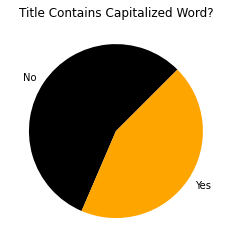

In [50]:
# Let's see how many trending video titles contain capitalized word
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False
us_video_data["contains_capitalized"] = us_video_data["title"].apply(contains_capitalized_word)
value_counts = us_video_data["contains_capitalized"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['black', 'orange'],startangle=45)
plt.title('Title Contains Capitalized Word?')
plt.show()

In [51]:
us_video_data["contains_capitalized"].value_counts(normalize=True)*100
# I can see that 44% of trending video titles contain at least a capitalized word.

False   56.04
True    43.96
Name: contains_capitalized, dtype: float64

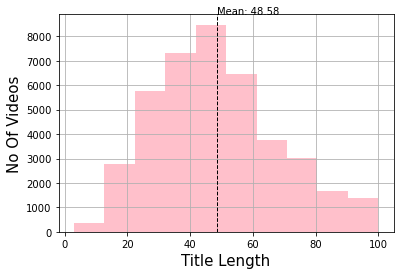

In [52]:
us_video_data["title_length"]= us_video_data["title"].apply(lambda x: len(x))
ax=us_video_data['title_length'].hist(color="pink")
ax.axvline(us_video_data['title_length'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax.text(us_video_data['title_length'].mean(), max_ylim, 'Mean: {:.2f}'.format(us_video_data['title_length'].mean()))
plt.xlabel("Title Length",fontsize=15)
plt.ylabel("No Of Videos",fontsize=15)
plt.show()
# I can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

In [53]:
#grouping_data = us_video_data.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)
#grouping_data_sorted= grouping_data.sort_values('video_count')
#fig=plt.figure(figsize=(12,6))
#plt.barh(grouping_data_sorted['channel_title'],grouping_data_sorted['video_count'],color=['yellow', 'pink', 'cyan'])
#plt.xlabel("No. Of Videos",size=18)
#plt.ylabel("Channel",size=18)
#plt.show()

In [54]:
len(us_video_data[(us_video_data["comments_disabled"] == True) & (us_video_data["ratings_disabled"] == True)].index)

106

<Figure size 1080x720 with 0 Axes>

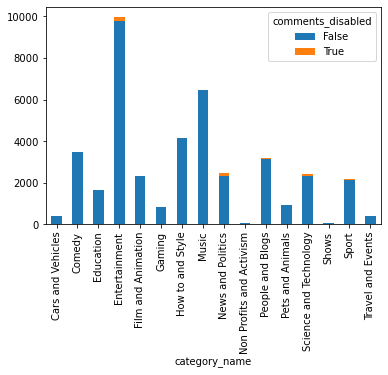

In [55]:
fig=plt.figure(figsize=(15,10))
data_us = us_video_data.groupby(['comments_disabled', 'category_name'])['category_name'].count().unstack('comments_disabled').fillna(0)
data_us.plot(kind='bar', stacked=True)

plt.show()

In [56]:
data_grt_50=us_video_data.channel_title.value_counts()
data_grt_50=data_grt_50[data_grt_50>50]
data_grt_50

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
TheEllenShow                              193
Netflix                                   193
                                         ... 
Epicurious                                 52
Lip Sync Battle                            52
Casey Holmes                               51
Jaiden Animations                          51
CBS Los Angeles                            51
Name: channel_title, Length: 203, dtype: int64

In [57]:
titles=list(data_grt_50.index)
titles

['ESPN',
 'The Tonight Show Starring Jimmy Fallon',
 'Vox',
 'TheEllenShow',
 'Netflix',
 'The Late Show with Stephen Colbert',
 'Jimmy Kimmel Live',
 'Late Night with Seth Meyers',
 'Screen Junkies',
 'NBA',
 'CNN',
 'Saturday Night Live',
 'WIRED',
 'BuzzFeedVideo',
 'INSIDER',
 'The Late Late Show with James Corden',
 'TED-Ed',
 'Tom Scott',
 'WWE',
 'CollegeHumor',
 'First We Feast',
 'HellthyJunkFood',
 'Tasty',
 'Bon Appétit',
 'Warner Bros. Pictures',
 'FBE',
 'Life Noggin',
 'jacksfilms',
 'The King of Random',
 'Good Mythical Morning',
 'Vanity Fair',
 'Vogue',
 'Safiya Nygaard',
 '20th Century Fox',
 'SciShow',
 'Smosh',
 'Dude Perfect',
 'Marques Brownlee',
 'Great Big Story',
 'Marvel Entertainment',
 'AsapSCIENCE',
 'ABC News',
 'NFL',
 'The Slow Mo Guys',
 'The Voice',
 'James Charles',
 'Kurzgesagt – In a Nutshell',
 "Simon's Cat",
 'Washington Post',
 'CrazyRussianHacker',
 'Binging with Babish',
 'NikkieTutorials',
 'Complex',
 'E! Entertainment',
 'You Suck At Cooking

In [58]:
new_data=us_video_data[us_video_data['channel_title'].isin(titles)]
new_data=new_data.reset_index()
new_data.drop(['index','video_id','trending_date','title','category_id','tags','thumbnail_link','description','publish_time','score',
              'label','likes_ratio','dislikes_ratio','likes_dislikes_ratio'],axis=1,inplace=True)
new_data[0:2]

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,date,video_id_date,comment_ratio,Date,category_name,contains_capitalized,title_length
0,CaseyNeistat,748374,57527,2966,15954,False,False,False,2017-11-13,2kyS6SvSYSE2017-11-14,2.13,2017-11-13 17:13:01,People and Blogs,True,34
1,Rudy Mancuso,3191434,146033,5339,8181,False,False,False,2017-11-12,5qpjK5DgCt42017-11-14,0.26,2017-11-12 19:05:24,Comedy,False,53


In [59]:
new_data.shape

(18804, 15)

### Creating derived variables

In [60]:
category_median_views = pd.DataFrame(new_data[['category_name', 'views']].groupby(['category_name']).median()).reset_index()
category_median_views.columns = ['category_name', 'category_median_views']

print(new_data.shape)
new_data = pd.merge(new_data,
                    category_median_views,
                    left_on = 'category_name',
                    right_on = 'category_name',
                    how = 'left')
print(new_data.shape)

(18804, 15)
(18804, 16)


In [61]:
new_data['views'].median()

895327.0

In [62]:
# Calculating a variable to measure whether a video will get more than 10,000 likes or not

new_data['views > 1000000'] = np.where(new_data['views'] > 1000000, 1, 0)

### Modeling

### Linear Regression

In [63]:
# One hot encoding is not possible because there are too many unique values in string columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in new_data.columns:
    if i in ['channel_title','comments_disabled','ratings_disabled','video_error_or_removed','category_name',
             'contains_capitalized']:
        new_data[i] = le.fit_transform(new_data[i])
new_data[0:2]

,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,date,video_id_date,comment_ratio,Date,category_name,contains_capitalized,title_length,category_median_views,views > 1000000
0,32,748374,57527,2966,15954,0,0,0,2017-11-13,2kyS6SvSYSE2017-11-14,2.13,2017-11-13 17:13:01,10,1,34,942962.00,0
1,130,3191434,146033,5339,8181,0,0,0,2017-11-12,5qpjK5DgCt42017-11-14,0.26,2017-11-12 19:05:24,1,0,53,1262895.00,1


In [64]:
new_data['ratings_disabled'].value_counts()

0    18793
1       11
Name: ratings_disabled, dtype: int64

In [65]:
new_data['views'].describe()

count       18804.00
mean      2162530.76
std       5144994.36
min          1143.00
25%        373079.50
50%        895327.00
75%       2023158.25
max     123010920.00
Name: views, dtype: float64

In [66]:
selected_col = ['likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                'comment_ratio', 'contains_capitalized', 'title_length', 'category_median_views']

X = new_data[selected_col]
y = new_data.views

In [67]:
new_data['video_error_or_removed'].value_counts()

0    18804
Name: video_error_or_removed, dtype: int64

In [68]:
# Multicollinearity check

X.corr()

# Comment count, dislikes, views are correlated. Need to do something
# comment_count is highly correlated, but I am not going to remove it because it's a sample data
# video_error_or_removed is always 0. Hence, corr value is null

,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,comment_ratio,contains_capitalized,title_length,category_median_views
likes,1.00,0.67,0.91,-0.02,-0.01,NaN,0.13,0.06,-0.10,0.31
dislikes,0.67,1.00,0.72,-0.01,-0.01,NaN,0.08,0.07,-0.08,0.18
comment_count,0.91,0.72,1.00,-0.02,-0.01,NaN,0.25,0.08,-0.08,0.21
comments_disabled,-0.02,-0.01,-0.02,1.00,0.27,NaN,-0.07,0.06,0.08,-0.05
ratings_disabled,-0.01,-0.01,-0.01,0.27,1.00,NaN,-0.02,0.03,-0.01,-0.01
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment_ratio,0.13,0.08,0.25,-0.07,-0.02,NaN,1.00,0.08,-0.11,-0.01
contains_capitalized,0.06,0.07,0.08,0.06,0.03,NaN,0.08,1.00,0.10,-0.02
title_length,-0.10,-0.08,-0.08,0.08,-0.01,NaN,-0.11,0.10,1.00,-0.09
category_median_views,0.31,0.18,0.21,-0.05,-0.01,NaN,-0.01,-0.02,-0.09,1.00


In [69]:
# VIF check
pd.Series([variance_inflation_factor(X.values, i)  for i in range(X.shape[1])], index=X.columns)

likes                    7.40
dislikes                 2.32
comment_count            7.96
comments_disabled        1.11
ratings_disabled         1.08
video_error_or_removed    NaN
comment_ratio            1.73
contains_capitalized     1.86
title_length             3.45
category_median_views    3.54
dtype: float64

In [70]:
# Based on corr matrix and VIF, I am going to exclude comment count column
X = X.drop('comment_count',axis = 1)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (15043, 9)
X_test:  (3761, 9)
y_train:  (15043,)
y_test:  (3761,)


In [72]:
X_train[0:2]

,likes,dislikes,comments_disabled,ratings_disabled,video_error_or_removed,comment_ratio,contains_capitalized,title_length,category_median_views
4123,23852,2103,0,0,0,0.31,0,32,453720.50
17064,37387,1084,0,0,0,0.26,1,37,720697.00


In [73]:
# Linear regression code

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

y_test_pred=linear_model.predict(X_test)
y_train_pred=linear_model.predict(X_train)

In [74]:
# Test data metrics

print("R^2: ", round(r2_score(y_test,y_test_pred), 2))
print("Adjusted R^2: ", round(1 - ( 1-linear_model.score(X_test, y_test) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ), 2))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))
print("MAE: ", round(mean_absolute_error(y_test,y_test_pred), 2))

R^2:  0.77
Adjusted R^2:  0.77
RMSE:  2693610.25
MAE:  1076636.54


In [75]:
# Train data metrics

# print("R^2: ", round(r2_score(y_train,y_train_pred), 2))
# print("Adjusted R^2: ", round(1 - ( 1-linear_model.score(X_train, y_train) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ), 2))
# print("RMSE: ", round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 2))
# print("MAE: ", round(mean_absolute_error(y_train,y_train_pred), 2))

In [76]:
# Getting p values
linear_mod = sm.OLS(y_train,X_train)
fii = linear_mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

likes                    0.00
dislikes                 0.00
comments_disabled        0.70
ratings_disabled         0.94
video_error_or_removed   0.95
comment_ratio            0.00
contains_capitalized     0.27
title_length             0.00
category_median_views    0.00
Name: P>|t|, dtype: float64

In [77]:
# Getting coefficients
coeff_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficients'])
print(coeff_df)

                        Coefficients
likes                          13.64
dislikes                      230.60
comments_disabled           97169.16
ratings_disabled          -170472.79
video_error_or_removed          0.00
comment_ratio            -1076590.10
contains_capitalized       -33839.97
title_length                 1773.20
category_median_views           0.09


In [78]:
# Recursive feature elimination

model = LinearRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)

#print(fit.n_features_)
#print(fit.support_)
#print(fit.ranking_)

list(X_train.iloc[:, fit.support_].columns)

['comments_disabled',
 'ratings_disabled',
 'comment_ratio',
 'contains_capitalized',
 'title_length']

### Logistic regression

In [79]:
selected_col = ['likes', 'dislikes', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                'comment_ratio', 'contains_capitalized', 'title_length', 'category_median_views']

X = new_data[selected_col]
y = new_data['views > 1000000']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (15043, 9)
X_test:  (3761, 9)
y_train:  (15043,)
y_test:  (3761,)


In [80]:
# Building logistic regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_test_pred = logistic_model.predict(X_test)
y_test_pred_probas = logistic_model.predict_proba(X_test)[:,1]

y_train_pred = logistic_model.predict(X_train)
y_train_pred_probas = logistic_model.predict_proba(X_train)[:,1]

In [81]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[1731  263]
 [ 391 1376]]


In [82]:
# Metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1994
           1       0.84      0.78      0.81      1767

    accuracy                           0.83      3761
   macro avg       0.83      0.82      0.82      3761
weighted avg       0.83      0.83      0.83      3761



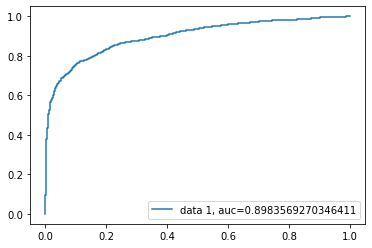

In [83]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_probas)
auc = metrics.roc_auc_score(y_test, y_test_pred_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [84]:
# Variable importance in logistic regression

var_imp = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(logistic_model.coef_).T], axis = 1)
var_imp.columns = ['var_name', 'coeff']

std_df = pd.DataFrame(np.std(X_train, 0)).reset_index()
std_df.columns = ['var_name', 'std']

var_imp = pd.merge(var_imp,
                   std_df,
                   left_on = 'var_name',
                   right_on = 'var_name',
                   how = 'left')
var_imp['coeff*std'] = var_imp['coeff']*var_imp['std']

var_imp['coeff*std_pos'] = abs(var_imp['coeff*std'])

var_imp = var_imp.sort_values(by = 'coeff*std_pos', ascending = False)
var_imp = var_imp.drop(['coeff*std_pos'], axis = 1)

var_imp['coeff'] = var_imp['coeff'].astype(str)
var_imp[0:5]

,var_name,coeff,std,coeff*std
0,likes,6.543046878078278e-05,217598.56,14.24
1,dislikes,0.0001839992225843802,7939.23,1.46
8,category_median_views,-9.627147059929782e-07,562576.01,-0.54
7,title_length,-0.02717864914347295,19.79,-0.54
5,comment_ratio,-0.0005474834379534029,0.57,-0.00


### Random Forest

In [85]:
#from sklearn.ensemble import RandomForestRegressor
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)

In [86]:
selected_col = ['likes', 'dislikes', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                'comment_ratio', 'contains_capitalized', 'title_length', 'category_median_views']

X = new_data[selected_col]
y = new_data.views

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (15043, 9)
X_test:  (3761, 9)
y_train:  (15043,)
y_test:  (3761,)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best HyperParameter:  {'max_depth': 30, 'n_estimators': 220}
0.981474198244082


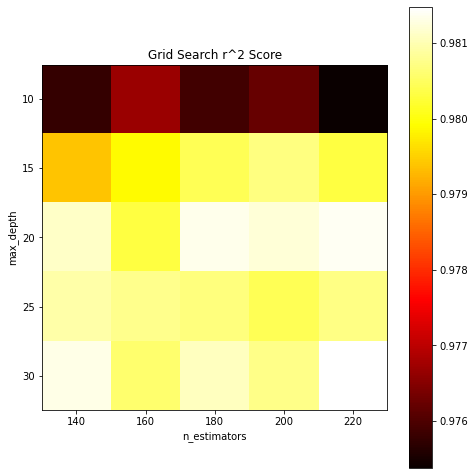

In [87]:
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [88]:
# Random forest model
rf_model = RandomForestRegressor(n_estimators = 180, max_depth = 20, max_features = 5)
# Using n_estimators = 180 & max_depth = 20 to avoid overfitting
rf_model.fit(X_train, y_train)

y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)

In [89]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_test_pred), 2))
print('Median Absolute Error:', round(metrics.median_absolute_error(y_test, y_test_pred), 2))
print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_absolute_percentage_error(y_test, y_test_pred), 2))
print('Max Error:', round(metrics.max_error(y_test, y_test_pred), 2))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_test_pred), 2))
print('Root Mean Squared Error (RMSE):', round(metrics.mean_squared_error(y_test, y_test_pred, squared=False), 2))
# print('R^2:', metrics.r2_score(y_test, y_test_pred))
# print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_pred))

Mean Absolute Error (MAE): 170401.46
Median Absolute Error: 50957.43
Mean Absolute Percentage Error (MAPE): 0.15
Max Error: 7985674.15
Mean Squared Error (MSE): 214807666258.6
Root Mean Squared Error (RMSE): 463473.48


In [90]:
rf_var_imp = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(rf_model.feature_importances_)], axis = 1)
rf_var_imp.columns = ['var_name', '% imp']
rf_var_imp['% imp'] = rf_var_imp['% imp']*100
rf_var_imp = rf_var_imp.sort_values(by = ['% imp'], ascending = False)
rf_var_imp

,var_name,% imp
0,likes,49.42
1,dislikes,38.46
5,comment_ratio,6.87
8,category_median_views,2.50
7,title_length,2.22
6,contains_capitalized,0.50
2,comments_disabled,0.04
3,ratings_disabled,0.00
4,video_error_or_removed,0.00


### SVR

In [91]:
# For SVR, before doing grid search, need to scale the data

X_train_scaled = preprocessing.scale(X_train)
y_train_scaled = preprocessing.scale(y_train) 
# Scaling target variable as well because there is a lot of variance in target variable too
# There are lot of video with 10 likes, 20 likes and there's video with 60,000 likes

X_test_scaled = preprocessing.scale(X_test)
y_test_scaled = preprocessing.scale(y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best HyperParameter:  {'C': 5, 'gamma': 1}
0.8683961252981479


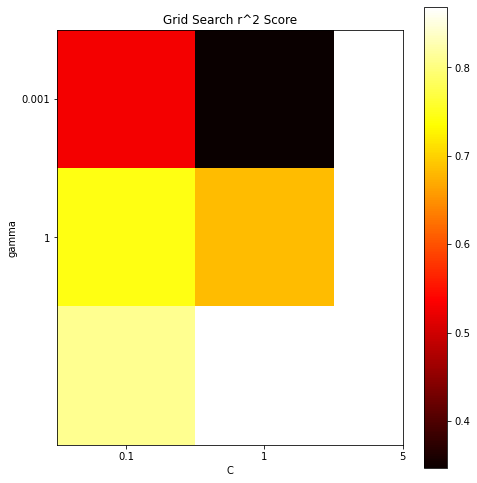

In [92]:
C_array = [0.1, 1, 5]
gamma = [0.001, 1]

svr_model = SVR()
hyperParam = [{'C':C_array,'gamma': gamma}]
gsv = GridSearchCV(svr_model,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)

gsv.fit(X_train_scaled, y_train_scaled)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C_array),len(gamma))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C_array)), C_array)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search r^2 Score')
plt.show()
gamma_para=gsv.best_params_['gamma']
C_para = gsv.best_params_['C']

In [93]:
# To hypertune more than 2 parameters (multiple parameter hypertuning)

#n_samples, n_features = 10, 5
#np.random.seed(0)
#y = np.random.randn(n_samples)
#X = np.random.randn(n_samples, n_features)
#parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
#svr = svm.SVR()
#clf = grid_search.GridSearchCV(svr, parameters)
#clf.fit(X,y)
#clf.best_params_

In [94]:
# Support Vector Machine

svm_model = SVR(kernel='linear', C=5,gamma=0.001)

svm_model.fit(X_train_scaled, y_train_scaled)

# make predictions
y_test_pred_scaled = svm_model.predict(X_test_scaled)
y_train_pred_scaled = svm_model.predict(X_train_scaled)

In [95]:
#print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test_scaled, y_test_pred_scaled))
#print('Median Absolute Error:', metrics.median_absolute_error(y_test_scaled, y_test_pred_scaled))
#print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test_scaled, y_test_pred_scaled))
#print('Max Error:', metrics.max_error(y_test_scaled, y_test_pred_scaled))
#print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test_scaled, y_test_pred_scaled))
#print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test_scaled, y_test_pred_scaled, squared=False))
print('R^2:', round(metrics.r2_score(y_test_scaled, y_test_pred_scaled), 2))
print('Explained Variance Score:', round(metrics.explained_variance_score(y_test_scaled, y_test_pred_scaled), 2))

R^2: 0.76
Explained Variance Score: 0.76


### SVC

In [96]:
selected_col = ['likes', 'dislikes', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                'comment_ratio', 'contains_capitalized', 'title_length', 'category_median_views']

X = new_data[selected_col]
y = new_data['views > 1000000']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


# Scaling X_train & X_test
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

X_train:  (15043, 9)
X_test:  (3761, 9)
y_train:  (15043,)
y_test:  (3761,)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best HyperParameter:  {'C': 5, 'gamma': 1}
0.9789327604710436


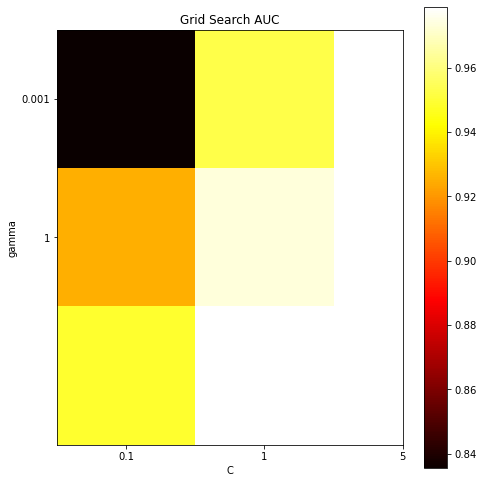

In [97]:
C_array = [0.1, 1, 5]
gamma = [0.001, 1]

svc_model = SVC()
hyperParam = [{'C':C_array,'gamma': gamma}]
gsv = GridSearchCV(svc_model,hyperParam,cv=5,verbose=1,scoring='roc_auc',n_jobs=-1)

gsv.fit(X_train_scaled, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(C_array),len(gamma))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(C_array)), C_array)
plt.yticks(np.arange(len(gamma)), gamma)
plt.title('Grid Search AUC')
plt.show()
gamma_para=gsv.best_params_['gamma']
C_para = gsv.best_params_['C']

In [98]:
# Building SVC model

svc_model = SVC(C = 5, gamma = 1, probability = True, kernel = 'linear')
svc_model.fit(X_train_scaled, y_train)

y_test_pred = svc_model.predict(X_test_scaled)
y_test_pred_probas = svc_model.predict_proba(X_test_scaled)[:,1]

y_train_pred = svc_model.predict(X_train_scaled)
y_train_pred_probas = svc_model.predict_proba(X_train_scaled)[:,1]

In [99]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[1862  132]
 [ 326 1441]]


In [100]:
# Metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1994
           1       0.92      0.82      0.86      1767

    accuracy                           0.88      3761
   macro avg       0.88      0.87      0.88      3761
weighted avg       0.88      0.88      0.88      3761



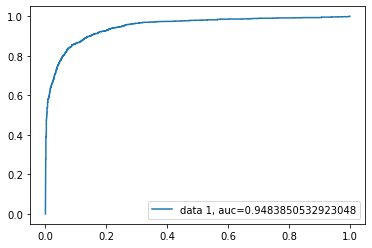

In [101]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_probas)
auc = metrics.roc_auc_score(y_test, y_test_pred_probas)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [102]:
# Variable importance in SVM

var_imp = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(svc_model.coef_).T], axis = 1)
var_imp.columns = ['var_name', 'coeff']
var_imp['coeff_pos'] = abs(var_imp['coeff'])
var_imp = var_imp.sort_values(by = 'coeff_pos', ascending = False)
var_imp = var_imp.drop(['coeff_pos'], axis = 1)

var_imp['coeff'] = var_imp['coeff'].astype(str)
var_imp[0:5]

,var_name,coeff
0,likes,13.91361320262763
1,dislikes,2.591603265466233
5,comment_ratio,-0.9943209436022471
7,title_length,0.15697686243822773
6,contains_capitalized,0.11510960546090132


### k-NN

In [103]:
# Just experimenting with k-nn

from sklearn.cluster import KMeans

knn_model = KMeans(n_clusters=4)
knn_model.fit(X) # Fitting on the whole data

KMeans(n_clusters=4)

In [104]:
pd.DataFrame(knn_model.labels_).value_counts()

0    10192
2     6250
3     1287
1     1075
dtype: int64

In [105]:
# Looks like clusters have been built based completely on popularity of videos

knn_model.cluster_centers_

array([[ 6.19878824e+04,  2.39623551e+03,  8.13805275e-03,
         7.37257477e-18,  0.00000000e+00,  4.01289306e-01,
         4.64359251e-01,  4.73271889e+01,  1.00682474e+06],
       [ 3.87919605e+05,  8.88802233e+03, -8.67361738e-18,
         3.25260652e-19,  0.00000000e+00,  4.92568618e-01,
         4.73488372e-01,  4.81572093e+01,  2.76585500e+06],
       [ 3.58028334e+04,  1.80915137e+03,  1.04116611e-02,
         1.76197341e-03,  0.00000000e+00,  5.02807537e-01,
         4.75252283e-01,  5.34320038e+01,  5.68298473e+05],
       [ 8.26306138e+04,  3.12220047e+03, -6.93889390e-18,
         4.33680869e-19,  0.00000000e+00,  4.16786416e-01,
         3.44988345e-01,  4.84693085e+01,  1.89714700e+06]])